# **Individual Formative assignment January 2025**

## Objectives

* Design and implement an ETL pipeline using Python.
* Visualise data using Matplotlib, Seaborn, and Plotly.
* Adhere to the key milestones and deliverables.
* Maximise future maintainability through documentation, code structure, and organisation.
* Document and present the project process and outcomes.
* Demonstrate and document the development process through a version control system such as GitHub.

Based of the Retail Sales Data Analysis Project Example.  

* Data analysis goals: 
Analyse retail sales data to identify trends, insights, and the impact of promotional markdowns on sales. 
Provide comprehensive, visually appealing sales reports and insights to assist in strategic decision-making.

*  Context

The challenge involves making decisions based on limited historical data, particularly around holidays and promotional events. The dataset includes historical sales data for 45 stores in different regions, with details about store types, sizes, and promotional markdowns.

*  Potential features to include:
ETL Pipeline:
    Extract: Load data from the Excel sheets (Stores, Features, Sales).
    Transform: Clean the data, handle missing values, and create new features such as sales differences between holiday and non-holiday weeks.
    Load: Store the transformed data in a format suitable for analysis (e.g., a cleaned DataFrame).
Data Visualisation:
    Descriptive Statistics: Display basic statistics such as average sales per store and department.
    Trend Analysis: Plot sales trends over time for different stores and departments.
    Impact Analysis: Visualise the impact of markdowns on sales during holidays versus non-holiday periods.
    Comparative Analysis: Compare sales performance across different stores and regions.

## Inputs

* Data source: https://www.kaggle.com/datasets/manjeetsingh/retaildataset 

## Outputs

* This notebook will be the combined output for the 2 day assignment

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/CI_DA_Project_Jan2025_pg/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/CI_DA_Project_Jan2025_pg'

# ETL - Step 1 data load

Section 1 - setup and import relevant modules

In order to undertake the required tasks the following python modules will be loaded into the Jupyter notebook.


import numpy as np
import pandas as pd
import datetime as dt
import math
import seaborn as sns


In [4]:
# load ETL Modules
import numpy as np
import pandas as pd
import datetime as dt
import math
import seaborn as sns


# Load Original Data

In [5]:
sales_df = pd.read_csv('sales_data-set.csv')
stores_df=  pd.read_csv('stores_data-set.csv')
features_df = pd.read_csv('Features_data_set.csv')

# Starting with sales_df

Review data and enhance it for analysis

In [6]:
#Headline data for 
sales_sum_df = pd.DataFrame({
    'DataType': sales_df.dtypes,
    'UniqueValues': sales_df.nunique(),
    'RowsWithData': len(sales_df)-sales_df.isnull().sum(),
    'NullValues':sales_df.isnull().sum(),
    'SkewScore':sales_df.skew(),
    'Kurtosis':sales_df.kurtosis()
})
sales_sum_df


/tmp/ipykernel_1098/1444125540.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'SkewScore':sales_df.skew(),
/tmp/ipykernel_1098/1444125540.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'Kurtosis':sales_df.kurtosis()


,DataType,UniqueValues,RowsWithData,NullValues,SkewScore,Kurtosis
Date,object,143,421570,0,NaN,NaN
Dept,int64,81,421570,0,0.358223,-1.215571
IsHoliday,bool,2,421570,0,3.359867,9.288747
Store,int64,45,421570,0,0.077763,-1.146503
Weekly_Sales,float64,359464,421570,0,3.262008,21.491290


In [7]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [8]:
# Change date to date format and create year/month and week fields and YearMonth YearWeek
# convert Received date to Date Format
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format='%d/%m/%Y')
# Append Year column
sales_df['SalesYear'] = round(sales_df['Date'].dt.year)
# Append Month column 
sales_df['SalesMonth'] = round(sales_df['Date'].dt.month)
# Append Week column
sales_df['SalesWeek'] = round(sales_df['Date'].dt.week)
# Create YearMonth Column
sales_df['SalesYearMonth'] = round(sales_df['SalesYear']*100 +sales_df['SalesMonth'])
# Create YearWeek Column
sales_df['SalesYearWeek'] = round(sales_df['SalesYear']*100 +sales_df['SalesWeek'])


/tmp/ipykernel_1098/2923548837.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  sales_df['SalesWeek'] = round(sales_df['Date'].dt.week)


Text(0.5, 1.0, 'Sales per week')

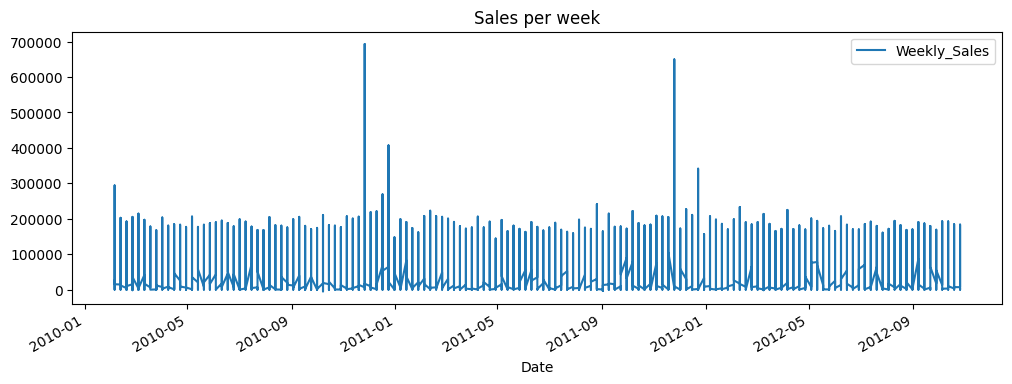

In [9]:
import matplotlib.pyplot as plt

#Initial Graph week by year total sales.
sales_df.plot(
    kind='line',
    x='Date',
    y='Weekly_Sales',
    figsize=(12, 4),
    linestyle='solid',
    legend=True
)

# Add the title separately
plt.title('Sales per week')


Text(0.5, 1.0, 'Sales per week')

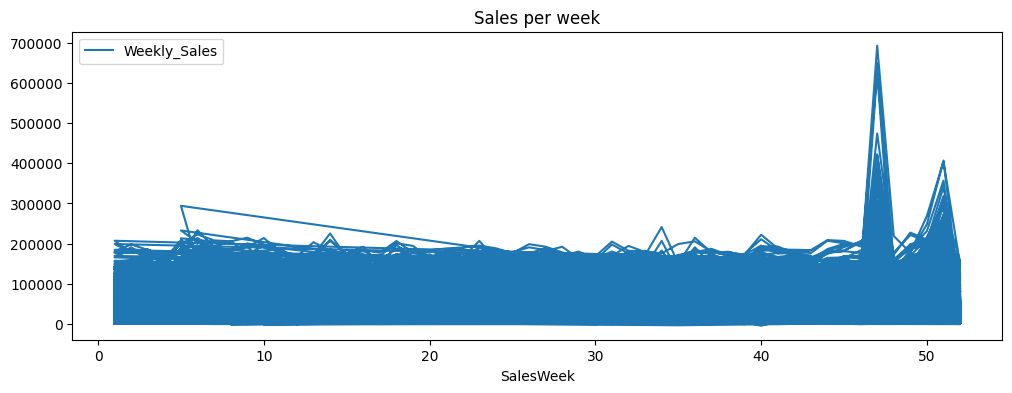

In [10]:
# enhance to show year on year

#Initial Graph week by year total sales.
sales_df.plot(
    kind='line',
    x='SalesWeek',
    y='Weekly_Sales',
    figsize=(12, 4),
    linestyle='solid',
    legend=True
)

# Add the title separately
plt.title('Sales per week')


Lets see box and whisker charts by store

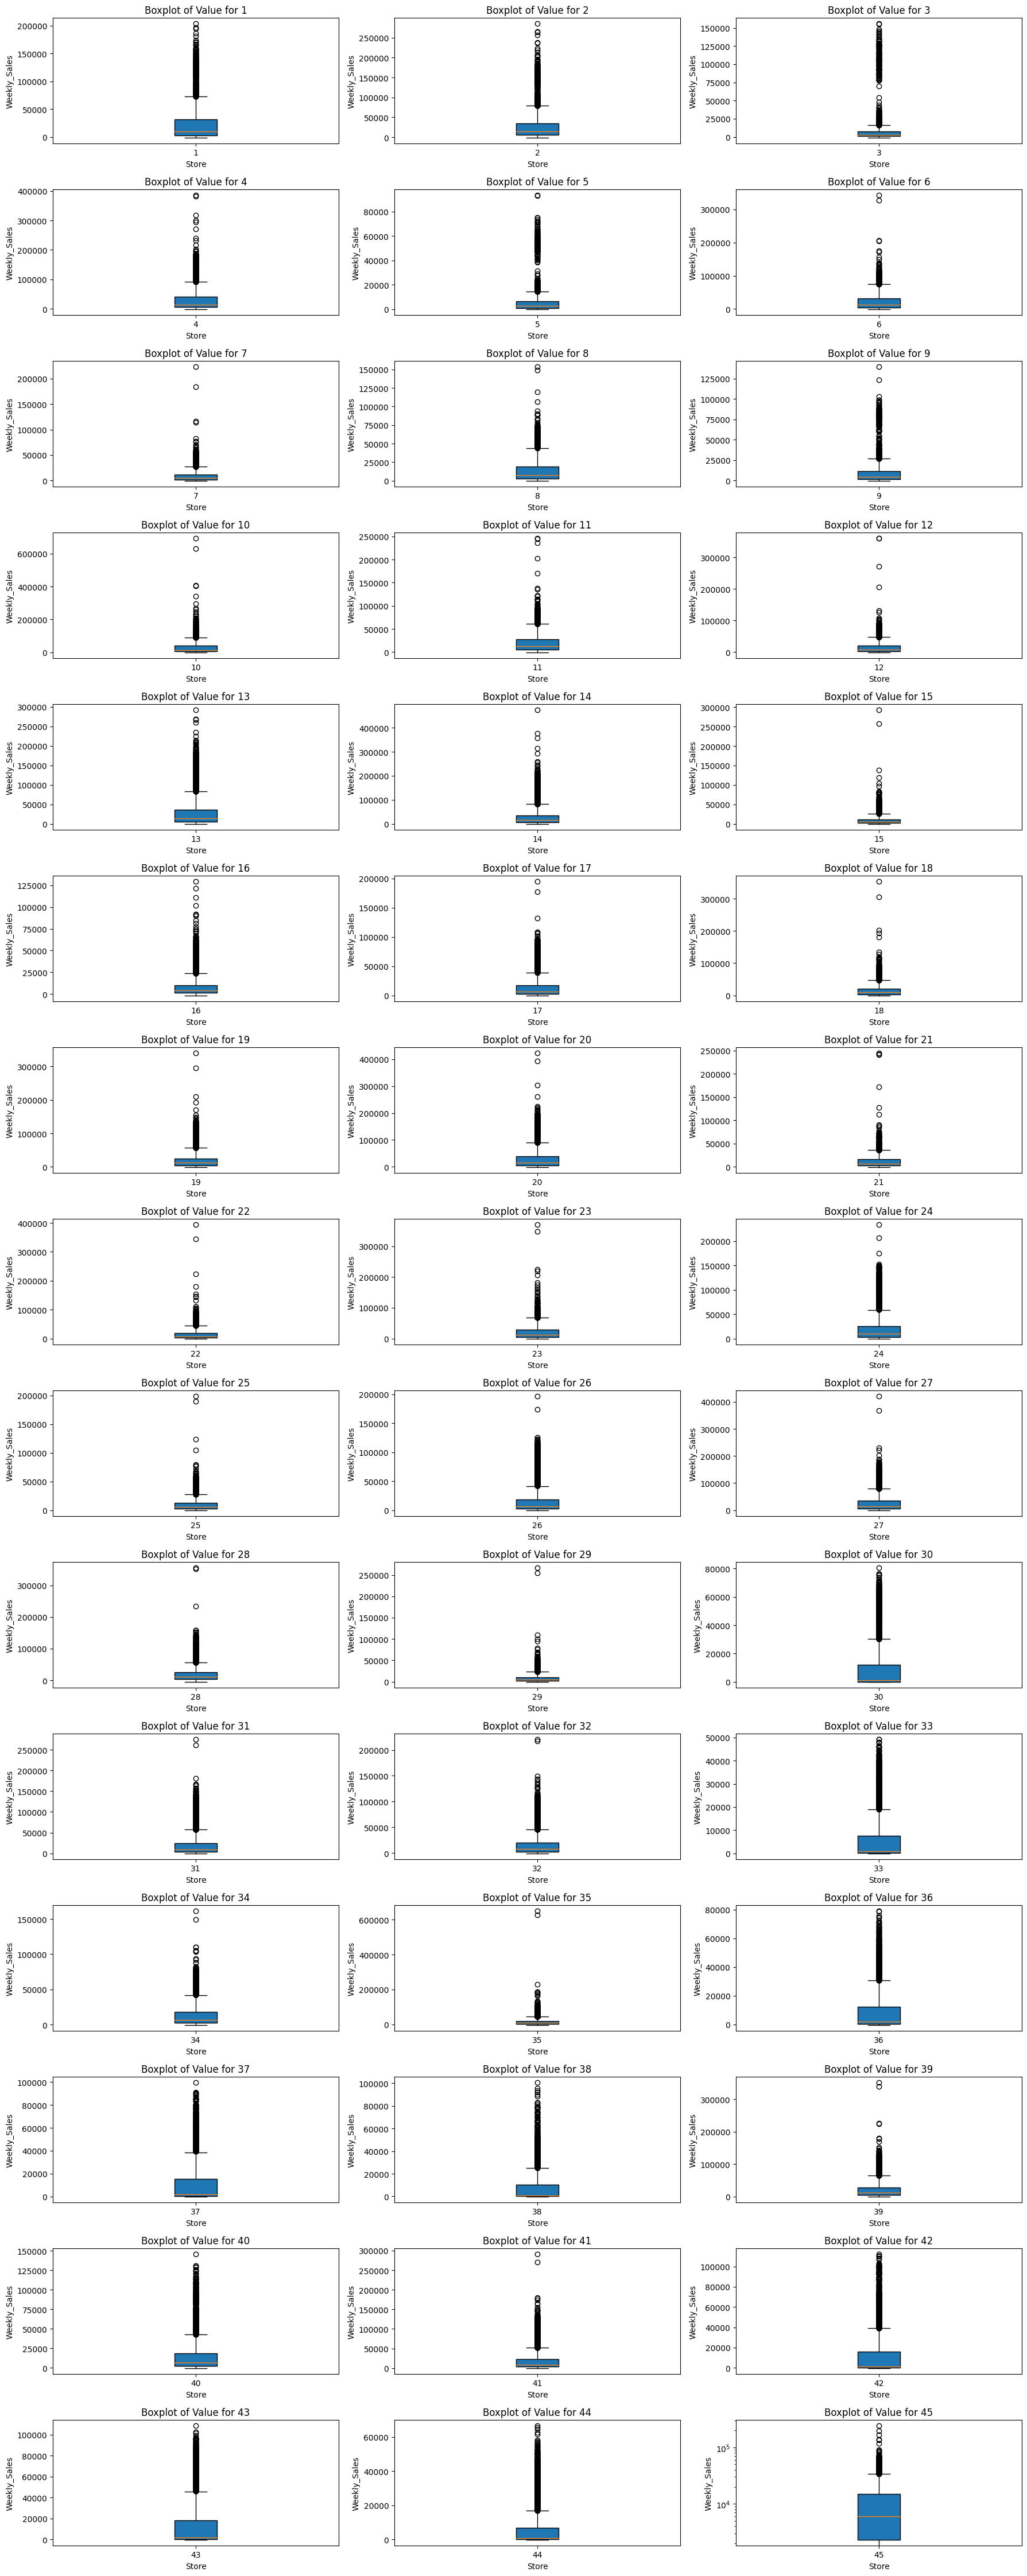

In [11]:
# Get unique values in RegEntity_Group
unique_groups = sales_df['Store'].unique()

# Number of plots per row
plots_per_row = 3

# Calculate the required number of rows
num_rows = math.ceil(len(unique_groups) / plots_per_row)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(18, 3 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through each unique value in RegEntity_Group and corresponding axes
for idx, group in enumerate(unique_groups):
    # Filter data for the current group
    group_data = sales_df.loc[sales_df['Store'] == group, 'Weekly_Sales'].dropna()
    
    # Create a boxplot for the current group
    axes[idx].boxplot(group_data, vert=True, patch_artist=True, labels=[group])
    
    # Add labels and title
    axes[idx].set_title(f'Boxplot of Value for {group}')
    axes[idx].set_ylabel('Weekly_Sales')
    axes[idx].set_xlabel('Store')

# Hide any unused axes
for ax in axes[len(unique_groups):]:
    ax.set_visible(False)

# Adjust layout and show plot
plt.yscale('log')
plt.tight_layout()
plt.show()

# Lets look at the other data sets 

Lets see what the Features and Stores data sets add

In [12]:
#Headline data for 
features_sum_df = pd.DataFrame({
    'DataType': features_df.dtypes,
    'UniqueValues': features_df.nunique(),
    'RowsWithData': len(features_df)-features_df.isnull().sum(),
    'NullValues': features_df.isnull().sum(),
    'SkewScore': features_df.skew(),
    'Kurtosis': features_df.kurtosis()
})
features_sum_df

/tmp/ipykernel_1098/2363745933.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'SkewScore': features_df.skew(),
/tmp/ipykernel_1098/2363745933.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'Kurtosis': features_df.kurtosis()


,DataType,UniqueValues,RowsWithData,NullValues,SkewScore,Kurtosis
CPI,float64,2505,7605,585,0.067668,-1.832113
Date,object,182,8190,0,NaN,NaN
Fuel_Price,float64,1011,8190,0,-0.305063,-0.952388
IsHoliday,bool,2,8190,0,3.328811,9.083200
MarkDown1,float64,4023,4032,4158,4.016436,23.687167
MarkDown2,float64,2715,2921,5269,4.962258,32.342187
MarkDown3,float64,2885,3613,4577,8.133806,72.068075
MarkDown4,float64,3405,3464,4726,4.864485,29.000294
MarkDown5,float64,4045,4050,4140,50.277824,2923.056530
Store,int64,45,8190,0,0.000000,-1.201186


In [13]:

# Replace NaN in MarkDown as 0
features_df['MarkDown1'] = features_df['MarkDown1'].fillna(0)
features_df['MarkDown2'] = features_df['MarkDown2'].fillna(0)
features_df['MarkDown3'] = features_df['MarkDown3'].fillna(0)
features_df['MarkDown4'] = features_df['MarkDown4'].fillna(0)
features_df['MarkDown5'] = features_df['MarkDown5'].fillna(0)
features_df['MarkDownTotal']= features_df['MarkDown1']+features_df['MarkDown2']+features_df['MarkDown3']+features_df['MarkDown4']+features_df['MarkDown5']
features_df['MarkDownData']= features_df['MarkDownTotal']>0
# Use fillna forward on Unemployment and CPI
features_df['CPI']=features_df['CPI'].fillna(method='ffill')
features_df['Unemployment']=features_df['Unemployment'].fillna(method='ffill')

# re run summary
features_pc_sum_df = pd.DataFrame({
    'DataType': features_df.dtypes,
    'UniqueValues': features_df.nunique(),
    'RowsWithData': len(features_df)-features_df.isnull().sum(),
    'NullValues': features_df.isnull().sum(),
    'SkewScore': features_df.skew(),
    'Kurtosis': features_df.kurtosis()
})
features_pc_sum_df

# 

/tmp/ipykernel_1098/1131086954.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'SkewScore': features_df.skew(),
/tmp/ipykernel_1098/1131086954.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'Kurtosis': features_df.kurtosis()


,DataType,UniqueValues,RowsWithData,NullValues,SkewScore,Kurtosis
CPI,float64,2505,8190,0,0.069261,-1.829348
Date,object,182,8190,0,NaN,NaN
Fuel_Price,float64,1011,8190,0,-0.305063,-0.952388
IsHoliday,bool,2,8190,0,3.328811,9.083200
MarkDown1,float64,4024,8190,0,5.018897,38.085707
MarkDown2,float64,2715,8190,0,8.346798,91.871712
MarkDown3,float64,2885,8190,0,12.384021,168.864347
MarkDown4,float64,3406,8190,0,7.258351,66.476518
MarkDown5,float64,4046,8190,0,67.033277,5415.604713
MarkDownData,bool,2,8190,0,0.022961,-1.999961


In [14]:
#Headline data for 
stores_sum_df = pd.DataFrame({
    'DataType': stores_df.dtypes,
    'UniqueValues': stores_df.nunique(),
    'RowsWithData': len(stores_df)-stores_df.isnull().sum(),
    'NullValues': stores_df.isnull().sum(),
    'SkewScore': stores_df.skew(),
    'Kurtosis': stores_df.kurtosis()
})
stores_sum_df

/tmp/ipykernel_1098/1886565280.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'SkewScore': stores_df.skew(),
/tmp/ipykernel_1098/1886565280.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'Kurtosis': stores_df.kurtosis()


,DataType,UniqueValues,RowsWithData,NullValues,SkewScore,Kurtosis
Size,int64,40,45,0,-0.200068,-1.372248
Store,int64,45,45,0,0.000000,-1.200000
Type,object,3,45,0,NaN,NaN


In [15]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


# Append the Store Data into the Sales Data to enable groupby type and size also to look as sales by size

In [16]:
enhancedsales_df=pd.merge(sales_df, stores_df, how='left', on=['Store'])
enhancedsales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,SalesYear,SalesMonth,SalesWeek,SalesYearMonth,SalesYearWeek,Type,Size
0,1,1,2010-02-05,24924.50,False,2010,2,5,201002,201005,A,151315
1,1,1,2010-02-12,46039.49,True,2010,2,6,201002,201006,A,151315
2,1,1,2010-02-19,41595.55,False,2010,2,7,201002,201007,A,151315
3,1,1,2010-02-26,19403.54,False,2010,2,8,201002,201008,A,151315
4,1,1,2010-03-05,21827.90,False,2010,3,9,201003,201009,A,151315


In [17]:
# Add Sales/size of store to produce a normalised sales per sqft figure
enhancedsales_df['SalesPerSqFt']=enhancedsales_df['Weekly_Sales']/enhancedsales_df['Size']
enhancedsales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,SalesYear,SalesMonth,SalesWeek,SalesYearMonth,SalesYearWeek,Type,Size,SalesPerSqFt
0,1,1,2010-02-05,24924.50,False,2010,2,5,201002,201005,A,151315,0.164719
1,1,1,2010-02-12,46039.49,True,2010,2,6,201002,201006,A,151315,0.304263
2,1,1,2010-02-19,41595.55,False,2010,2,7,201002,201007,A,151315,0.274894
3,1,1,2010-02-26,19403.54,False,2010,2,8,201002,201008,A,151315,0.128233
4,1,1,2010-03-05,21827.90,False,2010,3,9,201003,201009,A,151315,0.144255


# Append the Features Data into the Enhanced Sales Data to enable groupby type and size also to look as sales by size

In [18]:
# Change date on features_df to a dateformat.
features_df['Date'] = pd.to_datetime(features_df['Date'], format='%d/%m/%Y')
# merge enhanced and feature based on date and store
enhancedsales_df=pd.merge(enhancedsales_df, features_df, how='left', on=['Store','Date'])
enhancedsales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,SalesYear,SalesMonth,SalesWeek,SalesYearMonth,SalesYearWeek,...,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,MarkDownTotal,MarkDownData
0,1,1,2010-02-05,24924.50,False,2010,2,5,201002,201005,...,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0.0,False
1,1,1,2010-02-12,46039.49,True,2010,2,6,201002,201006,...,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,0.0,False
2,1,1,2010-02-19,41595.55,False,2010,2,7,201002,201007,...,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,0.0,False
3,1,1,2010-02-26,19403.54,False,2010,2,8,201002,201008,...,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,0.0,False
4,1,1,2010-03-05,21827.90,False,2010,3,9,201003,201009,...,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,0.0,False


In [36]:
#create a summary of sales per store per week
# function_dictionary = {'OrderID':'count','Quantity':'mean'}
salesaggregate = {'Weekly_Sales':'sum', 'SalesPerSqFt':'sum', 'Size': 'max', 'Temperature': 'max', 'Fuel_Price': 'max', 'Dept': 'count', 'Unemployment': 'max', 'IsHoliday_x': 'max', 'SalesYear': 'max', 'SalesWeek': 'max', 'SalesMonth': 'max', 'Type': 'first', 'CPI': 'max', 'MarkDownTotal': 'max', 'MarkDownData': 'max'}
storesalessummary = enhancedsales_df.groupby(['Store','Date'], as_index=False).agg(salesaggregate).reset_index()


storesalessummary['NonMarkedDownSales'] = storesalessummary['Weekly_Sales'] - storesalessummary['MarkDownTotal']
storesalessummary['PctSalesMarkedDown'] = storesalessummary['MarkDownTotal']/storesalessummary['Weekly_Sales']
storesalessummary['NMDS_PerSqFt'] = storesalessummary['NonMarkedDownSales']/ storesalessummary['Size']

storesalessummary.head(5)

,index,Store,Date,Weekly_Sales,SalesPerSqFt,Size,Temperature,Fuel_Price,Dept,Unemployment,...,SalesYear,SalesWeek,SalesMonth,Type,CPI,MarkDownTotal,MarkDownData,NonMarkedDownSales,PctSalesMarkedDown,NMDS_PerSqFt
0,0,1,2010-02-05,1643690.90,10.862710,151315,42.31,2.572,73,8.106,...,2010,5,2,A,211.096358,0.0,False,1643690.90,0.0,10.862710
1,1,1,2010-02-12,1641957.44,10.851254,151315,38.51,2.548,72,8.106,...,2010,6,2,A,211.242170,0.0,False,1641957.44,0.0,10.851254
2,2,1,2010-02-19,1611968.17,10.653063,151315,39.93,2.514,73,8.106,...,2010,7,2,A,211.289143,0.0,False,1611968.17,0.0,10.653063
3,3,1,2010-02-26,1409727.59,9.316509,151315,46.63,2.561,72,8.106,...,2010,8,2,A,211.319643,0.0,False,1409727.59,0.0,9.316509
4,4,1,2010-03-05,1554806.68,10.275298,151315,46.50,2.625,73,8.106,...,2010,9,3,A,211.350143,0.0,False,1554806.68,0.0,10.275298


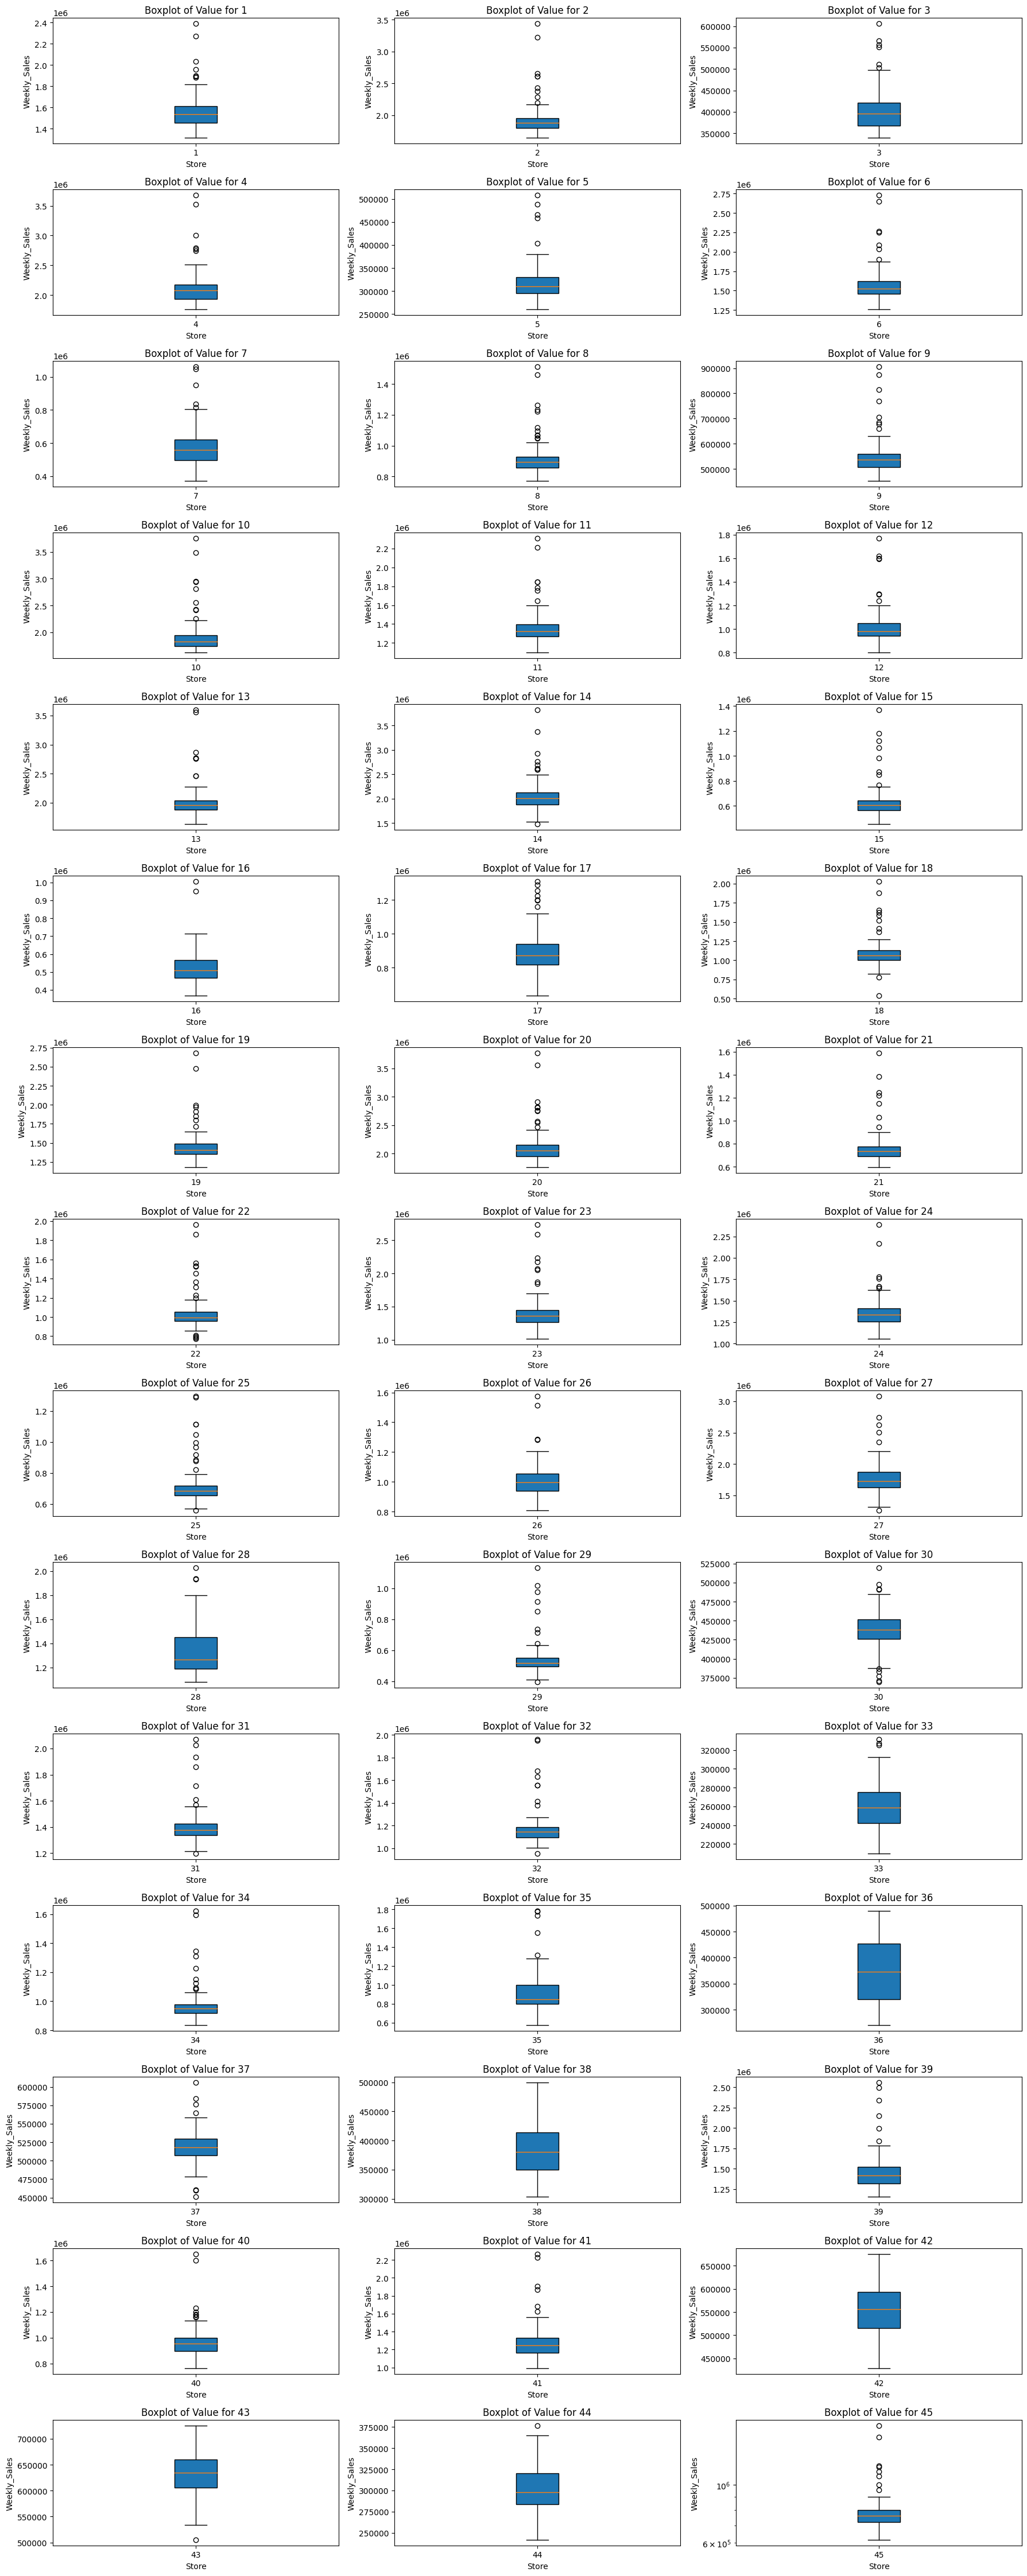

In [37]:
# ReRun Box and Whisker per store

# Get unique values in RegEntity_Group
unique_groups = storesalessummary['Store'].unique()

# Number of plots per row
plots_per_row = 3

# Calculate the required number of rows
num_rows = math.ceil(len(unique_groups) / plots_per_row)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(18, 3 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through each unique value in RegEntity_Group and corresponding axes
for idx, group in enumerate(unique_groups):
    # Filter data for the current group
    group_data = storesalessummary.loc[storesalessummary['Store'] == group, 'Weekly_Sales'].dropna()
    
    # Create a boxplot for the current group
    axes[idx].boxplot(group_data, vert=True, patch_artist=True, labels=[group])
    
    # Add labels and title
    axes[idx].set_title(f'Boxplot of Value for {group}')
    axes[idx].set_ylabel('Weekly_Sales')
    axes[idx].set_xlabel('Store')

# Hide any unused axes
for ax in axes[len(unique_groups):]:
    ax.set_visible(False)

# Adjust layout and show plot
plt.yscale('log')
plt.tight_layout()
plt.show()

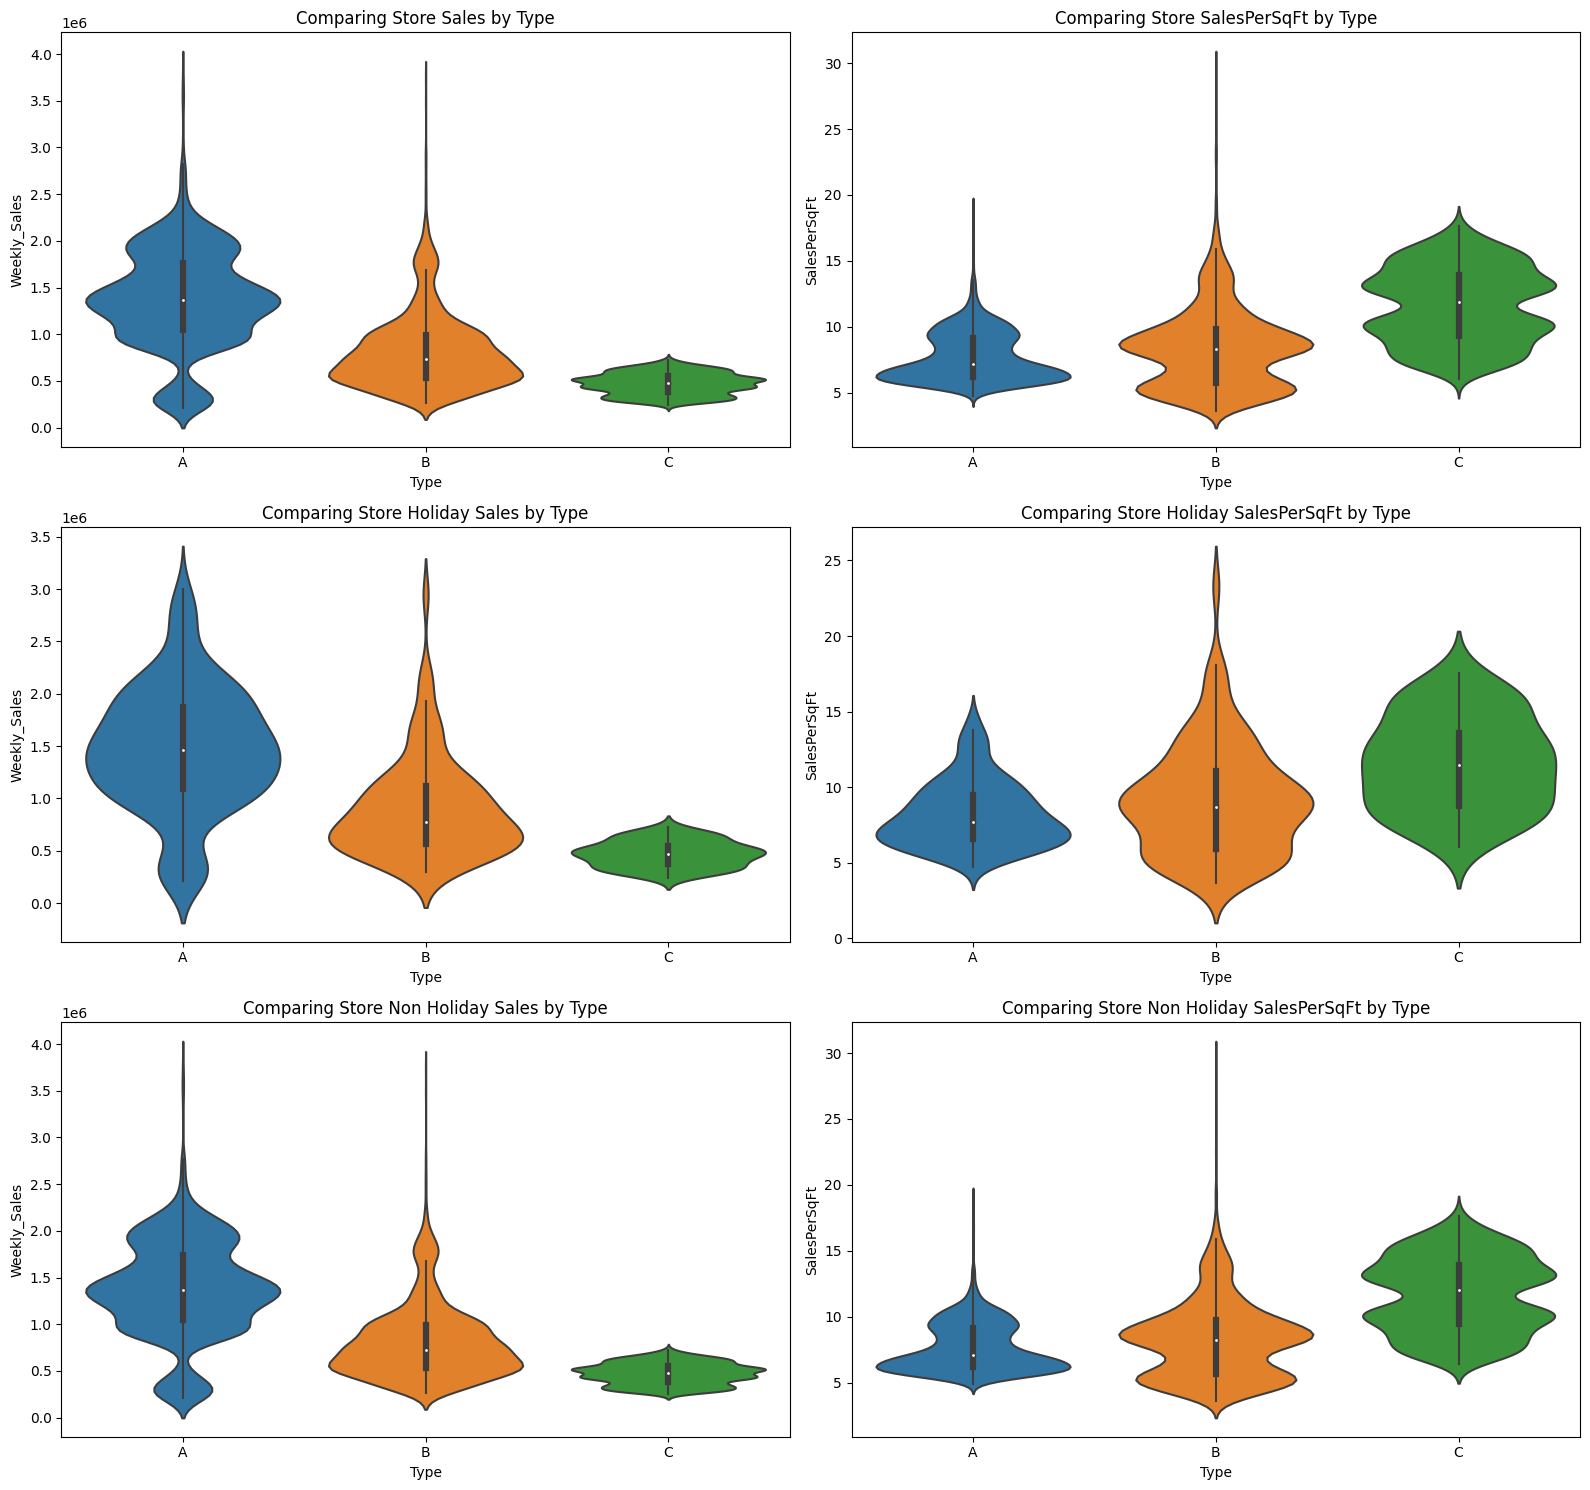

In [38]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 15))

# First plot
sns.violinplot(
    x='Type', y='Weekly_Sales', data=storesalessummary[['Weekly_Sales', 'Type']],
    ax=axes[0, 0], scale='width'  # Assign the specific subplot axis
)
axes[0, 0].set_title('Comparing Store Sales by Type')

# Second plot
sns.violinplot(
    x='Type', y='SalesPerSqFt', data=storesalessummary[['SalesPerSqFt', 'Type']],
    ax=axes[0, 1], scale='width'  # Assign the specific subplot axis
)
axes[0, 1].set_title('Comparing Store SalesPerSqFt by Type')

# third plot = Weekly Sales for Holiday Weeks
sns.violinplot(
    x='Type', y='Weekly_Sales', data=storesalessummary.query('IsHoliday_x == True')[['Weekly_Sales', 'Type']],
    ax=axes[1, 0], scale='width'  # Assign the specific subplot axis
)
axes[1, 0].set_title('Comparing Store Holiday Sales by Type')

# Forth plot = Weekly SalesPerSqFt for Holiday Weeks
sns.violinplot(
    x='Type', y='SalesPerSqFt', data=storesalessummary.query('IsHoliday_x == True')[['SalesPerSqFt', 'Type']],
    ax=axes[1, 1], scale='width'  # Assign the specific subplot axis
)
axes[1, 1].set_title('Comparing Store Holiday SalesPerSqFt by Type')

# fifth plot = Weekly Sales for Non Holiday Weeks
sns.violinplot(
    x='Type', y='Weekly_Sales', data=storesalessummary.query('IsHoliday_x == False')[['Weekly_Sales', 'Type']],
    ax=axes[2, 0], scale='width'  # Assign the specific subplot axis
)
axes[2, 0].set_title('Comparing Store Non Holiday Sales by Type')

# Six plot = Weekly SalesPerSqFt for Non Holiday Weeks
sns.violinplot(
    x='Type', y='SalesPerSqFt', data=storesalessummary.query('IsHoliday_x == False')[['SalesPerSqFt', 'Type']],
    ax=axes[2, 1], scale='width'  # Assign the specific subplot axis
)
axes[2, 1].set_title('Comparing Store Non Holiday SalesPerSqFt by Type')

# Adjust layout
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='SalesWeek'>

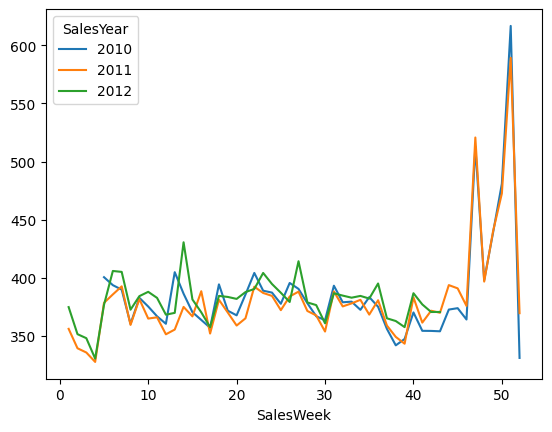

In [33]:
Weekly_storesalessummary = pd.pivot_table(storesalessummary, index ='SalesWeek', columns = 'SalesYear', values = 'SalesPerSqFt', aggfunc='sum')
Weekly_storesalessummary.plot()

<AxesSubplot:xlabel='SalesMonth'>

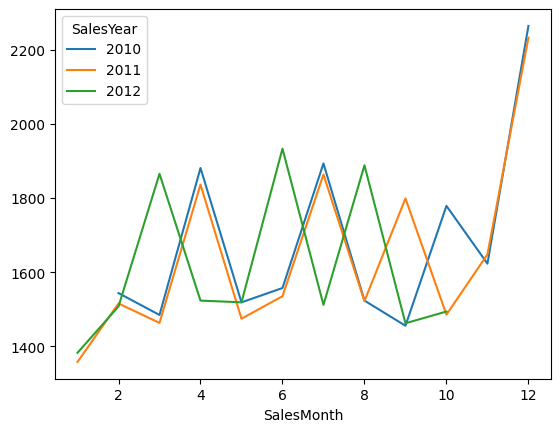

In [41]:
Weekly_storesalessummary2 = pd.pivot_table(storesalessummary, index ='SalesMonth', columns = 'SalesYear', values = 'NMDS_PerSqFt', aggfunc='sum')
Weekly_storesalessummary2.plot()

---

# Store and Department level performance information and Graphs.  

Using the sales_df at weekly sales per department level produce a set of visualisations to enable store managers to review store specific performance by department over time

In [42]:
# Calculate Delta fields for Weekly Sales both Year on Year and Week on Week, aslo create moving 13 week average.

# Add rolling 4 and 13 week total sales
sales_df['Dept_Roll_4wk_sales'] = sales_df.sort_values(['Store','Dept','Date'])['Weekly_Sales'].rolling(4).sum()
sales_df['Dept_Roll_Qtr_sales'] = sales_df.sort_values(['Store','Dept','Date'])['Weekly_Sales'].rolling(13).sum()

# week on week PCT change per store department
sales_df['Dept_weekly_Growth_Rate'] = sales_df.sort_values(['Store','Dept','Date'])['Weekly_Sales'].pct_change(periods=1) * 100
# Year on Year PCT Change per store department
sales_df['Dept_yearly_Growth_Rate'] = sales_df.sort_values(['Store','Dept','Date'])['Weekly_Sales'].pct_change(periods=53) * 100
# week on week PCT change per store department for 4 week rolling and 13 week rolling
sales_df['Dept_4wk_roll_Growth_Rate'] = sales_df.sort_values(['Store','Dept','Date'])['Dept_Roll_4wk_sales'].pct_change(periods=1) * 100
sales_df['Dept_13wk_roll_Growth_Rate'] = sales_df.sort_values(['Store','Dept','Date'])['Dept_Roll_Qtr_sales'].pct_change(periods=1) * 100

sales_df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,SalesYear,SalesMonth,SalesWeek,SalesYearMonth,SalesYearWeek,Dept_Roll_4wk_sales,Dept_Roll_Qtr_sales,Dept_weekly_Growth_Rate,Dept_yearly_Growth_Rate,Dept_4wk_roll_Growth_Rate,Dept_13wk_roll_Growth_Rate
0,1,1,2010-02-05,24924.50,False,2010,2,5,201002,201005,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2010-02-12,46039.49,True,2010,2,6,201002,201006,NaN,NaN,84.715802,NaN,NaN,NaN
2,1,1,2010-02-19,41595.55,False,2010,2,7,201002,201007,NaN,NaN,-9.652453,NaN,NaN,NaN
3,1,1,2010-02-26,19403.54,False,2010,2,8,201002,201008,131963.08,NaN,-53.351885,NaN,NaN,NaN
4,1,1,2010-03-05,21827.90,False,2010,3,9,201003,201009,128866.48,NaN,12.494421,NaN,-2.346565,NaN


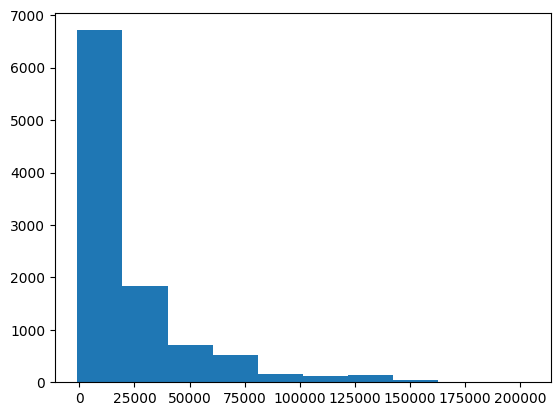

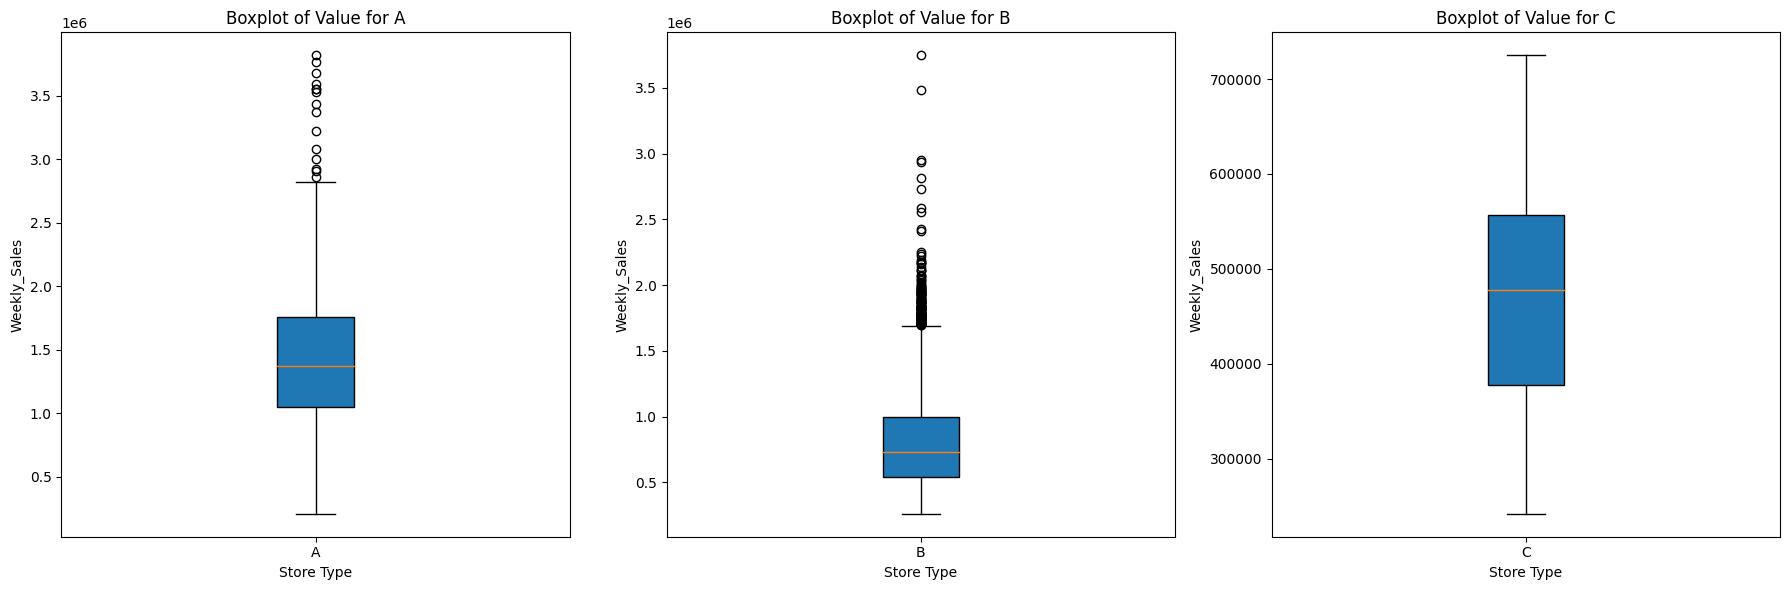

In [44]:
plt.hist(sales_df.query('Store== 1').Weekly_Sales)

# Get unique values in RegEntity_Group
unique_groups = storesalessummary['Type'].unique()

# Number of plots per row
plots_per_row = 3

# Calculate the required number of rows
num_rows = math.ceil(len(unique_groups) / plots_per_row)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(18, 6 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through each unique value in RegEntity_Group and corresponding axes
for idx, group in enumerate(unique_groups):
    # Filter data for the current group
    group_data = storesalessummary.loc[storesalessummary['Type'] == group, 'Weekly_Sales'].dropna()
    
    # Create a boxplot for the current group
    axes[idx].boxplot(group_data, vert=True, patch_artist=True, labels=[group])
    
    # Add labels and title
    axes[idx].set_title(f'Boxplot of Value for {group}')
    axes[idx].set_ylabel('Weekly_Sales')
    axes[idx].set_xlabel('Store Type')

# Hide any unused axes
for ax in axes[len(unique_groups):]:
    ax.set_visible(False)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

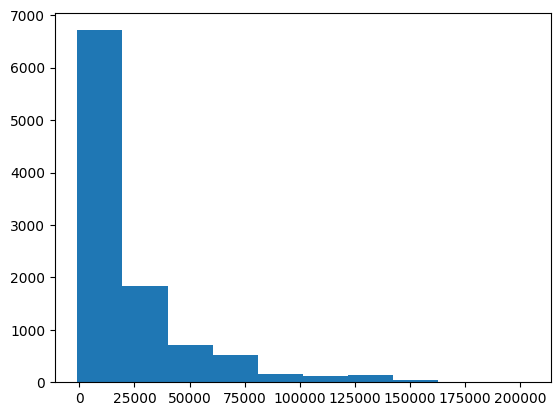

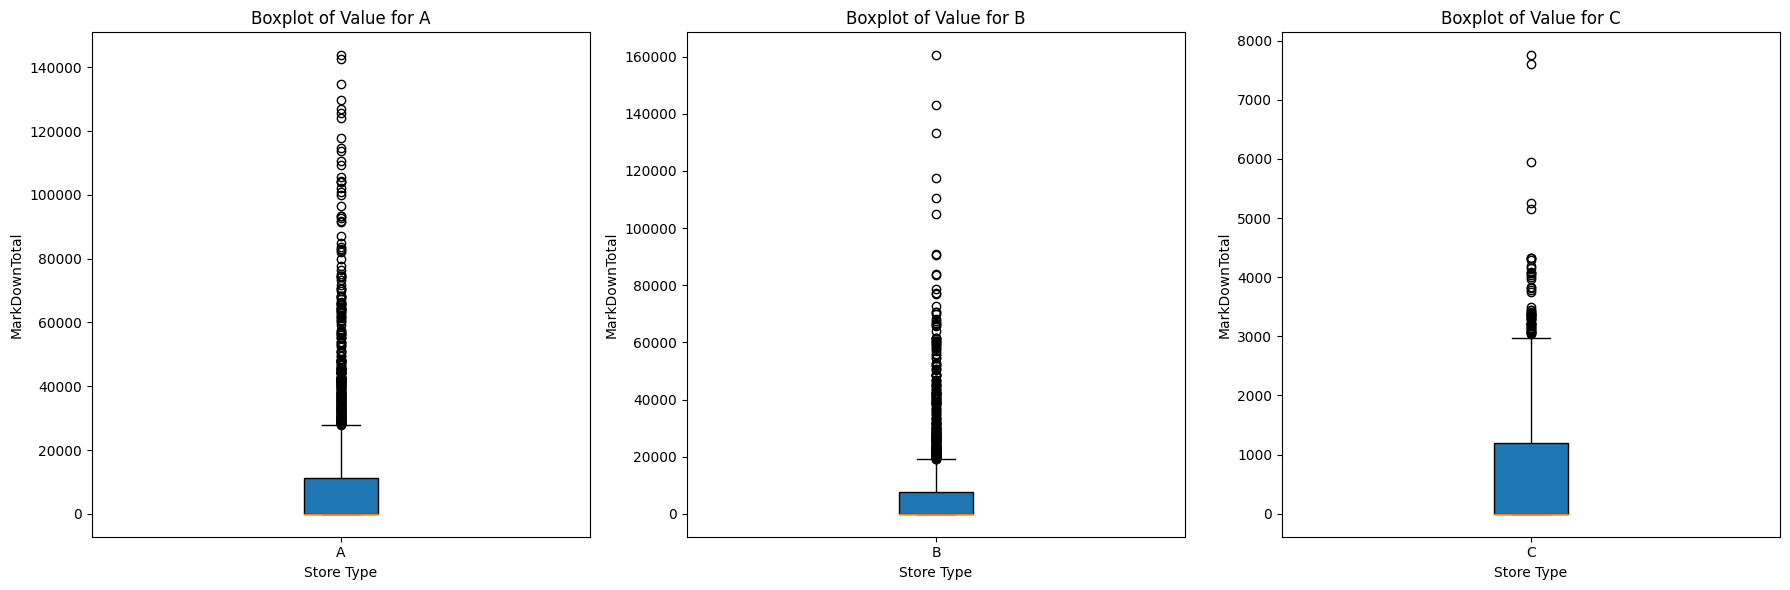

In [45]:
plt.hist(sales_df.query('Store== 1').Weekly_Sales)

# Get unique values in RegEntity_Group
unique_groups = storesalessummary['Type'].unique()

# Number of plots per row
plots_per_row = 3

# Calculate the required number of rows
num_rows = math.ceil(len(unique_groups) / plots_per_row)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(18, 6 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through each unique value in RegEntity_Group and corresponding axes
for idx, group in enumerate(unique_groups):
    # Filter data for the current group
    group_data = storesalessummary.loc[storesalessummary['Type'] == group, 'MarkDownTotal'].dropna()
    
    # Create a boxplot for the current group
    axes[idx].boxplot(group_data, vert=True, patch_artist=True, labels=[group])
    
    # Add labels and title
    axes[idx].set_title(f'Boxplot of Value for {group}')
    axes[idx].set_ylabel('MarkDownTotal')
    axes[idx].set_xlabel('Store Type')

# Hide any unused axes
for ax in axes[len(unique_groups):]:
    ax.set_visible(False)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Scatter Marke Down Sales vs Percent of Sales Marked down Non holiday weeks')

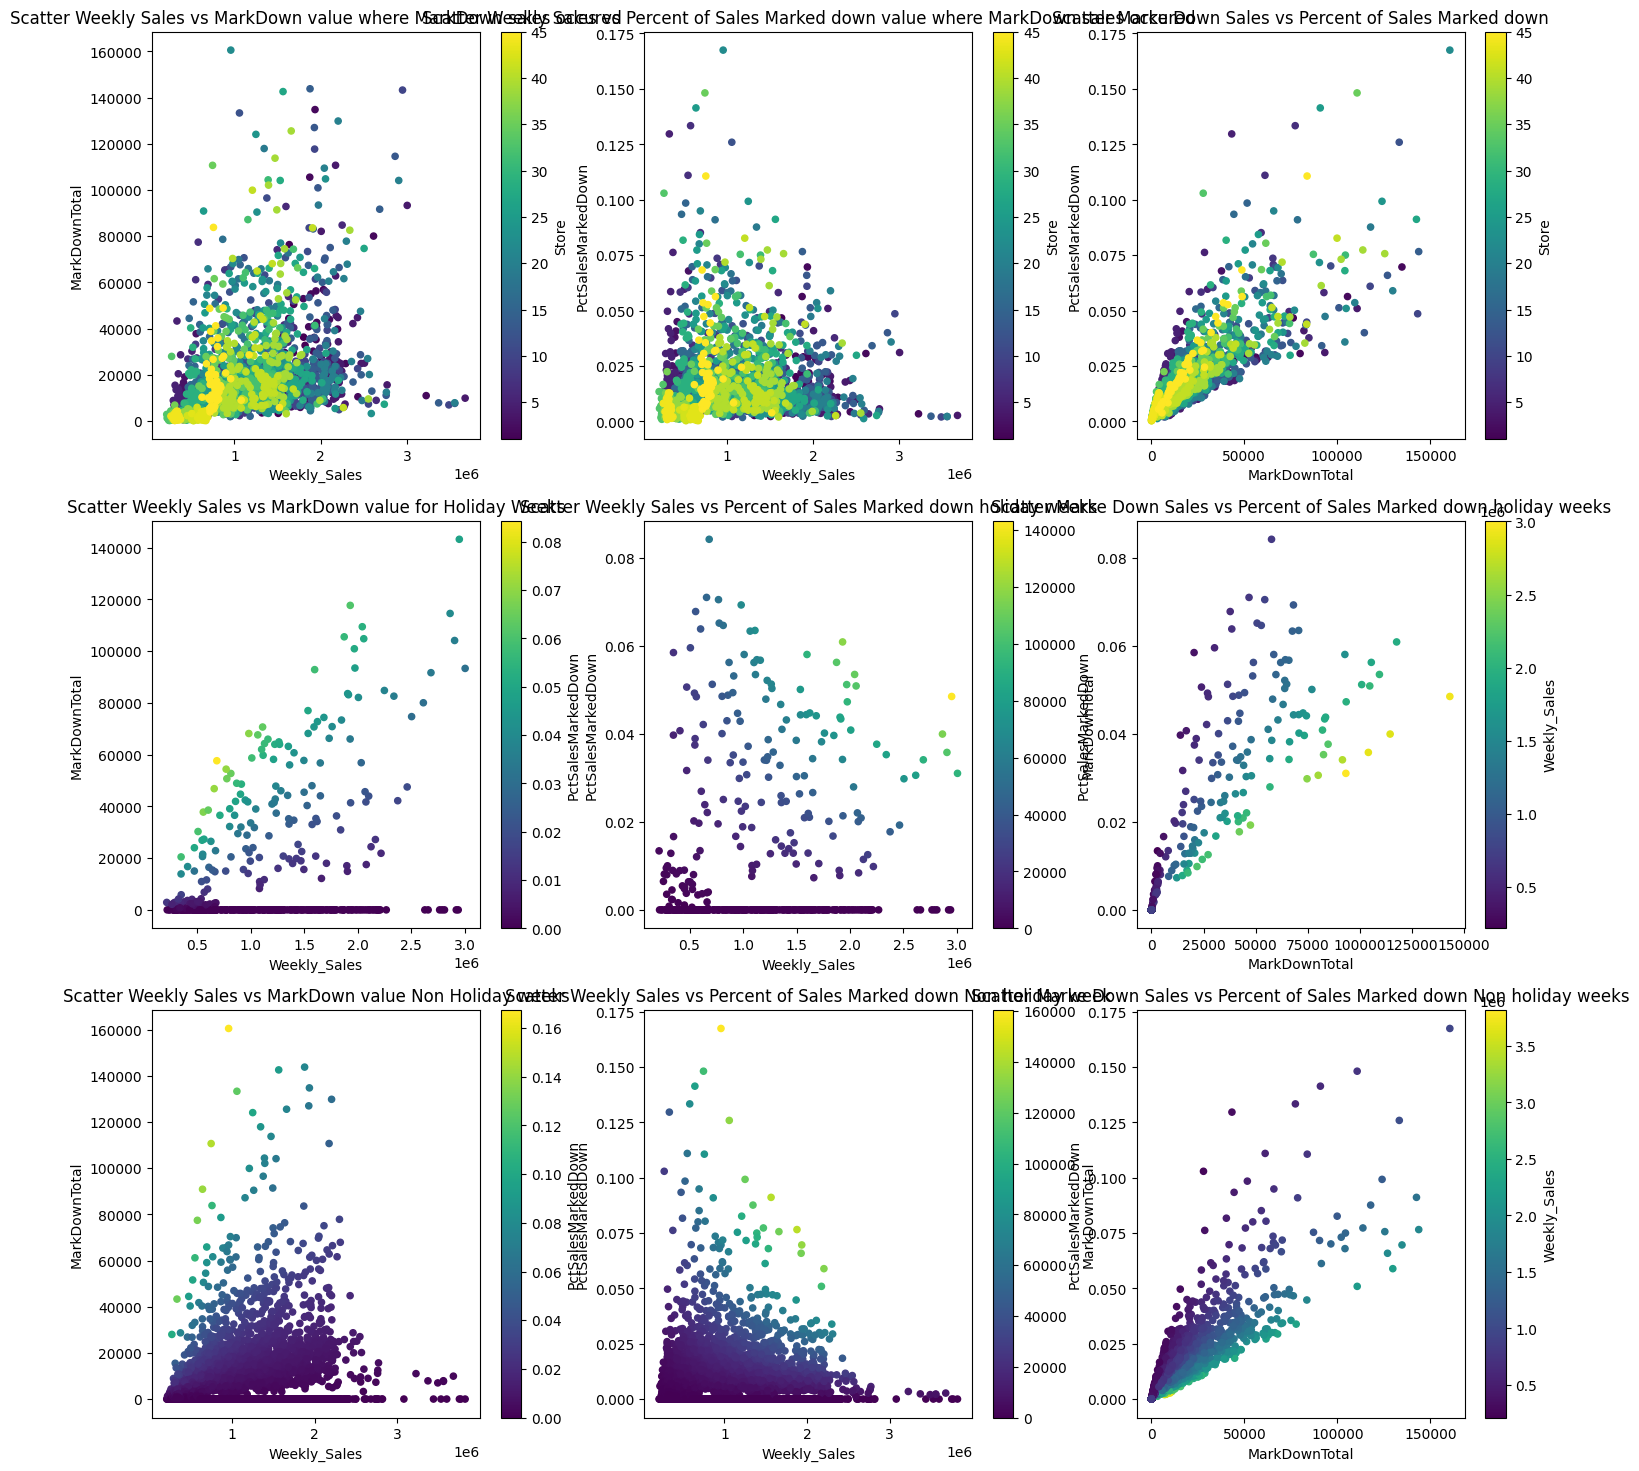

In [59]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

storesalessummary.query('MarkDownTotal >0').plot(kind='scatter', x='Weekly_Sales', y='MarkDownTotal', c='Store', colormap='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Scatter Weekly Sales vs MarkDown value where MarkDown sales occured')
storesalessummary.query('MarkDownTotal >0').plot(kind='scatter', x='Weekly_Sales', y='PctSalesMarkedDown', c='Store', colormap='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Scatter Weekly Sales vs Percent of Sales Marked down value where MarkDown sales occured')
storesalessummary.query('MarkDownTotal >0').plot(kind='scatter', x='MarkDownTotal', y='PctSalesMarkedDown', c='Store', colormap='viridis', ax=axes[0, 2])
axes[0, 2].set_title('Scatter Marke Down Sales vs Percent of Sales Marked down')
storesalessummary.query('IsHoliday_x == True').plot(kind='scatter', x='Weekly_Sales', y='MarkDownTotal', c='PctSalesMarkedDown', colormap='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Scatter Weekly Sales vs MarkDown value for Holiday Weeks')
storesalessummary.query('IsHoliday_x == True').plot(kind='scatter', x='Weekly_Sales', y='PctSalesMarkedDown', c='MarkDownTotal', colormap='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Scatter Weekly Sales vs Percent of Sales Marked down holiday weeks')
storesalessummary.query('IsHoliday_x == True').plot(kind='scatter', x='MarkDownTotal', y='PctSalesMarkedDown', c='Weekly_Sales', colormap='viridis', ax=axes[1, 2])
axes[1, 2].set_title('Scatter Marke Down Sales vs Percent of Sales Marked down holiday weeks')
storesalessummary.query('IsHoliday_x == False').plot(kind='scatter', x='Weekly_Sales', y='MarkDownTotal', c='PctSalesMarkedDown', colormap='viridis', ax=axes[2, 0])
axes[2, 0].set_title('Scatter Weekly Sales vs MarkDown value Non Holiday weeks')
storesalessummary.query('IsHoliday_x == False').plot(kind='scatter', x='Weekly_Sales', y='PctSalesMarkedDown', c='MarkDownTotal', colormap='viridis', ax=axes[2, 1])
axes[2, 1].set_title('Scatter Weekly Sales vs Percent of Sales Marked down Non holiday week')
storesalessummary.query('IsHoliday_x == False').plot(kind='scatter', x='MarkDownTotal', y='PctSalesMarkedDown', c='Weekly_Sales', colormap='viridis', ax=axes[2, 2])
axes[2, 2].set_title('Scatter Marke Down Sales vs Percent of Sales Marked down Non holiday weeks')

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Conclusion and Next Steps

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.